In [261]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr, Lasso as ls, Ridge as rg, ElasticNet as en, LogisticRegression as loglr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr, KNeighborsClassifier as knc, KernelDensity
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr, RandomForestClassifier as rfc, GradientBoostingClassifier as gbc, AdaBoostRegressor
from sklearn.preprocessing import Imputer, normalize, StandardScaler, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr, DecisionTreeClassifier as dtc
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer as pst
from sklearn.neural_network import MLPRegressor
mms = MinMaxScaler()
rc = RobustScaler()
ss = StandardScaler()

In [317]:
df_real = pd.read_csv('C:/Users/visha/Desktop/EDC/Reality.csv', index_col = None, header = 0)

In [3]:
df_real.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,03-Feb-2014,154.35,154.35,150.90,151.30,43314088,188.65
1,04-Feb-2014,149.05,153.15,147.80,152.35,58775256,339.53
2,05-Feb-2014,151.90,155.70,151.90,155.00,50497100,230.32
3,06-Feb-2014,155.20,155.80,151.40,152.25,46806769,215.91
4,07-Feb-2014,153.95,155.10,153.00,153.70,40228870,155.88
5,10-Feb-2014,156.20,157.85,155.30,155.70,39475826,186.01
6,11-Feb-2014,154.95,155.80,154.00,154.45,24104442,109.24
7,12-Feb-2014,155.10,156.20,152.55,153.65,41902226,158.19
8,13-Feb-2014,153.35,155.65,153.15,154.55,54546557,239.12
9,14-Feb-2014,154.20,155.20,152.65,154.65,49842187,231.20


In [4]:
del df_real['High']

In [5]:
del df_real['Low']

In [6]:
df_real.tail(10)

,Date,Open,Close,Shares Traded,Turnover (Rs. Cr)
231,15-Jan-2015,200.40,211.45,171376467,967.67
232,16-Jan-2015,210.90,212.35,137078786,807.53
233,19-Jan-2015,214.10,212.75,95628439,378.34
234,20-Jan-2015,214.35,215.70,69376013,395.35
235,21-Jan-2015,216.20,215.05,59387965,326.88
236,22-Jan-2015,215.60,216.35,75623425,414.82
237,23-Jan-2015,219.80,219.60,102836277,620.68
238,27-Jan-2015,220.00,222.25,78873772,515.92
239,28-Jan-2015,220.55,225.20,91393417,578.26
240,29-Jan-2015,223.90,231.45,155649406,938.59


In [7]:
df_real.corr('spearman')

,Open,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.987913,0.495219,0.629512
Close,0.987913,1.000000,0.513293,0.652236
Shares Traded,0.495219,0.513293,1.000000,0.933081
Turnover (Rs. Cr),0.629512,0.652236,0.933081,1.000000


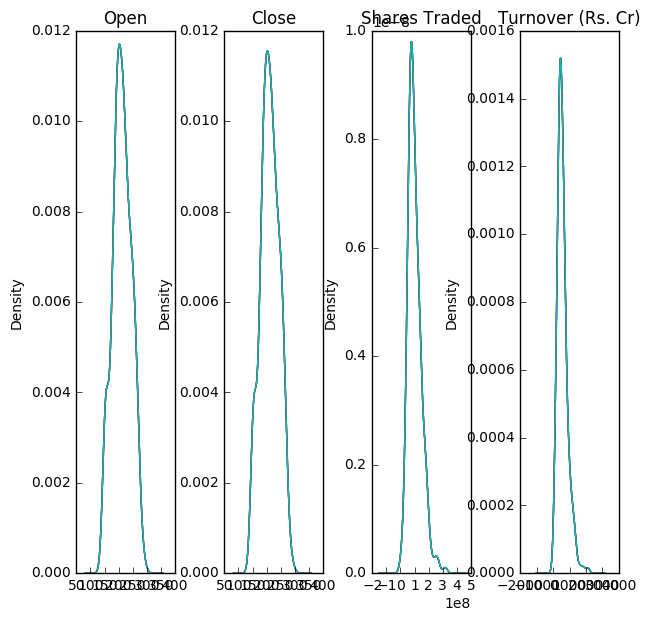

In [8]:

%matplotlib inline


num_df = df_real.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(1,4, figsize = (7, 7))

fig.subplots_adjust(hspace=.3, wspace=.5)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

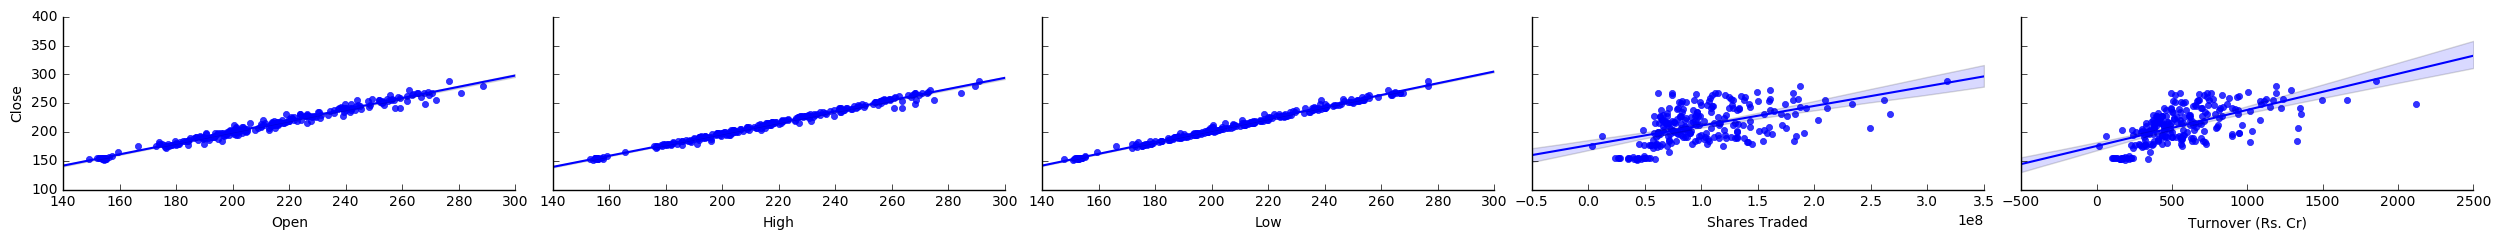

In [398]:
sns.pairplot(df_real, x_vars = ['Open', 'High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)'], y_vars = ['Close'], kind = 'reg', aspect = 2)

In [10]:
df_real.describe()

,Open,Close,Shares Traded,Turnover (Rs. Cr)
count,241.00000,241.000000,2.410000e+02,241.000000
mean,211.61390,211.513900,1.017061e+08,574.687593
std,31.92996,31.588503,4.750571e+07,316.803229
min,149.05000,151.300000,3.559144e+06,17.360000
25%,190.20000,191.000000,6.930826e+07,373.680000
50%,211.50000,211.450000,9.147360e+07,506.750000
75%,237.20000,235.300000,1.283929e+08,710.490000
max,288.40000,288.950000,3.176848e+08,2121.670000


In [407]:
X_r = df_real[['Open', 'High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)']]

In [408]:
y_r = df_real['Close']

In [409]:
X_train_r, X_test_r, y_train_r, y_test_r = tts(X_r, y_r, test_size = .33, random_state = 1)

In [410]:
Lin_r = lr(normalize = 0)

In [411]:
Lin_r.fit(X_train_r, y_train_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=0)

In [412]:
np.sqrt(metrics.mean_squared_error(y_test_r, Lin_r.predict(X_test_r)))

1.6497096191738321

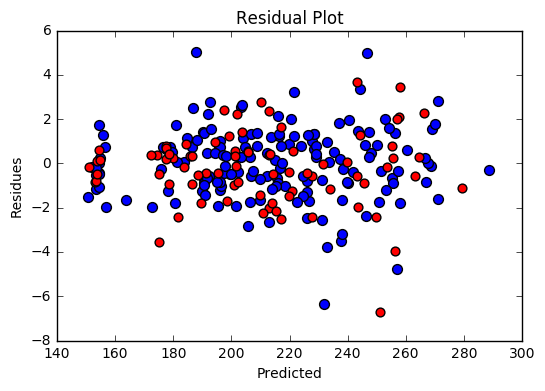

In [405]:
plt.scatter(Lin_r.predict(X_train_r), Lin_r.predict(X_train_r) - y_train_r, c = 'b', s = 50)
plt.scatter(Lin_r.predict(X_test_r), Lin_r.predict(X_test_r) - y_test_r, c = 'r', s = 40)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot')

In [18]:
Lin.predict([[236.95, 110794680, 573.01]])

array([ 234.54452573])

In [19]:
boost = gbr(max_features = 'auto', loss = 'lad', random_state = 1, n_estimators = 100)

In [20]:
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [21]:
np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test)))

5.4366101397207345

In [22]:
boost.predict([[237.70, 136046636, 790.51]])

array([ 236.20326537])

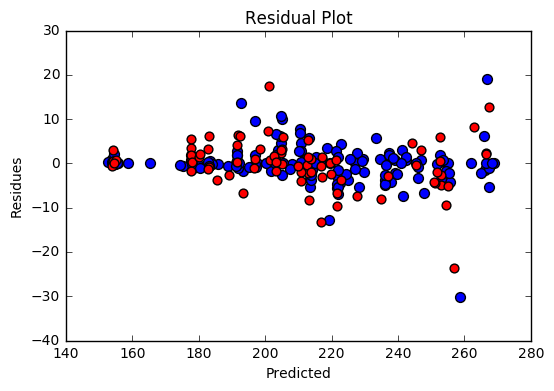

In [23]:
plt.scatter(boost.predict(X_train), boost.predict(X_train) - y_train, c = 'b', s = 50)
plt.scatter(boost.predict(X_test), boost.predict(X_test) - y_test, c = 'r', s = 40)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot')

In [24]:
tree = dtr(splitter = 'random', max_features = 'sqrt', random_state = 1)

In [25]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, tree.predict(X_test)))

6.8239559641017626

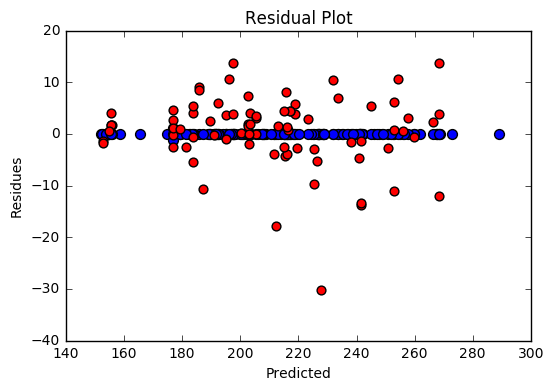

In [27]:
plt.scatter(tree.predict(X_train), tree.predict(X_train) - y_train, c = 'b', s = 50)
plt.scatter(tree.predict(X_test), tree.predict(X_test) - y_test, c = 'r', s = 40)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot')

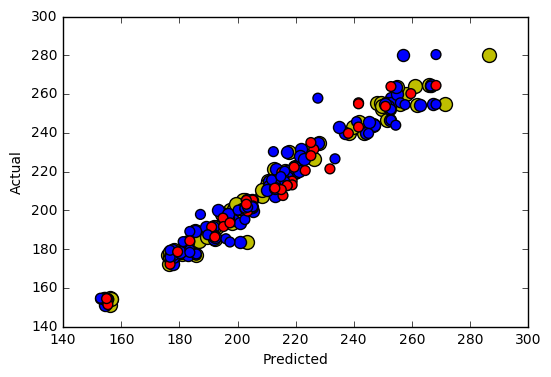

In [28]:
plt.scatter(Lin.predict(X_test), y_test, s = 100, c = 'y')
plt.scatter(boost.predict(X_test), y_test, s = 75, c = 'b')
plt.scatter(tree.predict(X_test), y_test, s = 50, c = 'br')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
df_bank = pd.read_csv('C:/Users/visha/Desktop/EDC/Bank.csv', index_col = None, header = 0)

In [30]:
df_bank.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,03-Feb-2014,10205.45,10222.65,10089.25,10102.10,30407535,1439.62
1,04-Feb-2014,9983.65,10222.10,9944.00,10191.20,35509598,1636.98
2,05-Feb-2014,10215.65,10254.05,10112.50,10231.65,27701842,1356.39
3,06-Feb-2014,10257.10,10321.50,10107.80,10205.20,34755087,1854.40
4,07-Feb-2014,10311.95,10321.10,10180.85,10263.20,23139510,1274.60
5,10-Feb-2014,10287.35,10310.30,10187.80,10213.90,17969925,891.89
6,11-Feb-2014,10242.10,10296.80,10200.60,10245.45,15230792,803.65
7,12-Feb-2014,10307.60,10395.15,10307.60,10348.80,24104934,1369.18
8,13-Feb-2014,10360.70,10386.65,10113.80,10135.70,25803512,1343.57
9,14-Feb-2014,10169.00,10229.45,10064.75,10203.75,28283283,1721.80


In [31]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
Date                 241 non-null object
Open                 241 non-null float64
High                 241 non-null float64
Low                  241 non-null float64
Close                241 non-null float64
Shares Traded        241 non-null int64
Turnover (Rs. Cr)    241 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [32]:
df_bank.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000
mean,15249.117427,15381.410996,15131.381535,15262.928631,3.415814e+07,2133.358963
std,2536.639486,2538.948638,2518.354413,2527.208217,1.404428e+07,824.196862
min,9983.650000,10222.100000,9944.000000,10102.100000,1.617161e+06,114.540000
25%,13023.400000,13124.300000,12952.500000,13037.400000,2.417982e+07,1634.000000
50%,15405.750000,15518.750000,15221.150000,15367.600000,3.065704e+07,1997.600000
75%,16812.450000,17060.150000,16783.650000,17045.050000,4.006591e+07,2487.490000
max,20507.500000,20907.550000,20435.000000,20555.250000,1.038929e+08,8187.390000


In [33]:
df_bank.corr('spearman')

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.992160,0.995036,0.988101,0.222522,0.093648
High,0.992160,1.000000,0.991621,0.991784,0.249344,0.116537
Low,0.995036,0.991621,1.000000,0.995154,0.211096,0.080717
Close,0.988101,0.991784,0.995154,1.000000,0.224376,0.093838
Shares Traded,0.222522,0.249344,0.211096,0.224376,1.000000,0.802140
Turnover (Rs. Cr),0.093648,0.116537,0.080717,0.093838,0.802140,1.000000


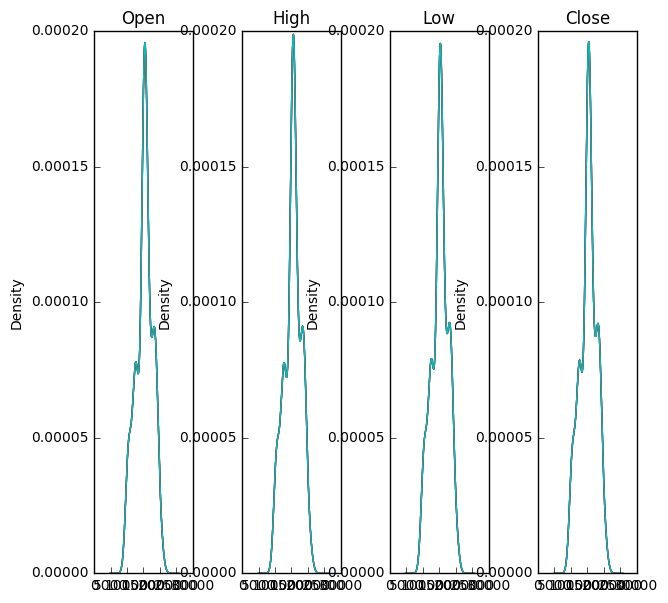

In [34]:

%matplotlib inline


num_df = df_bank.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(1,4, figsize = (7, 7))

fig.subplots_adjust(hspace=.3, wspace=.5)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

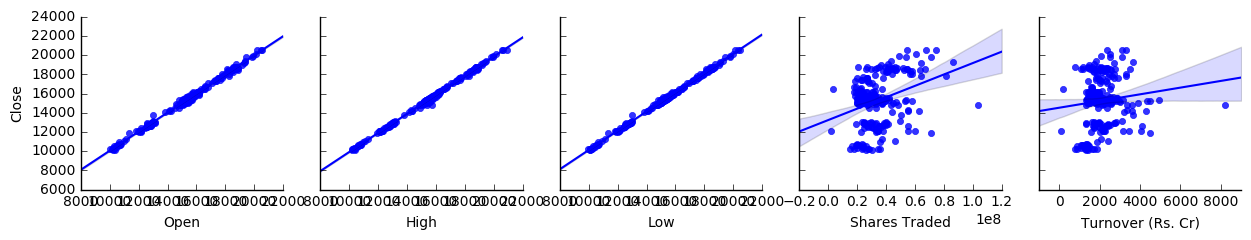

In [35]:
sns.pairplot(df_bank, x_vars = ['Open','High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)'], y_vars = ['Close'], kind = 'reg', aspect = 1)

In [36]:
df_bank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')

In [437]:
X_b = df_bank[['Open', 'High', 'Low']]
y_b = df_bank['Close']

In [439]:
X_train_b, X_test_b, y_train_b, y_test_b = tts(X_b, y_b, test_size = .33, random_state = 1)

In [440]:
Lin_b = lr(normalize = 0)

In [441]:
Lin_b.fit(X_train_b, y_train_b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=0)

In [442]:
np.sqrt(metrics.mean_squared_error(y_test_b, Lin_b.predict(X_test_b)))

27.515810770582178

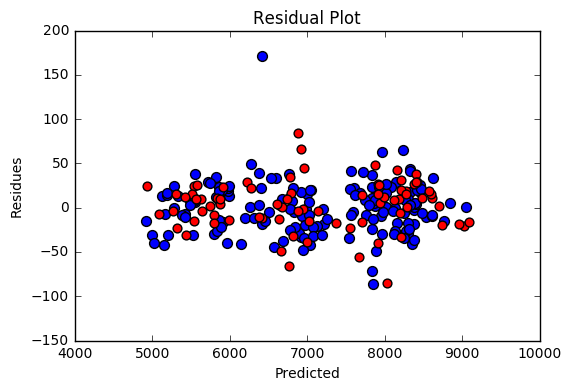

In [201]:
plt.scatter(Lin.predict(X_train), Lin.predict(X_train) - y_train, c = 'b', s = 50)
plt.scatter(Lin.predict(X_test), Lin.predict(X_test) - y_test, c = 'r', s = 40)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot')

In [202]:
boost = gbr(max_features = 'auto', loss = 'ls', random_state = 1, n_estimators = 100)

In [203]:
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [204]:
np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test)))

60.443707904716618

In [205]:
tree = dtr(splitter = 'random', max_features = 'auto', random_state = 1)

In [206]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')

In [207]:
np.sqrt(metrics.mean_squared_error(y_test, tree.predict(X_test)))

75.7929053408035

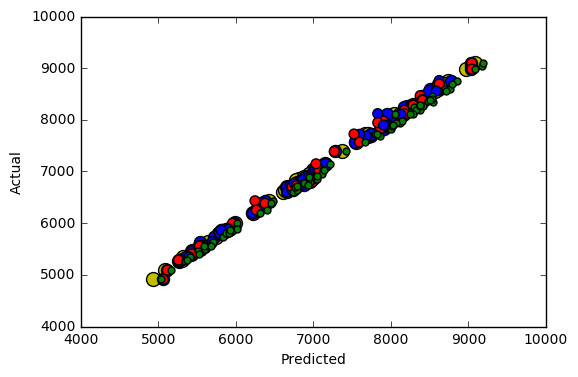

In [224]:
plt.scatter(Lin.predict(X_test), y_test, s = 100, c = 'y')
plt.scatter(boost.predict(X_test), y_test, s = 75, c = 'b')
plt.scatter(tree.predict(X_test), y_test, s = 50, c = 'br')
plt.scatter(mlp.predict(X_test), y_test, s = 25, c = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [208]:
rid = rg(random_state = 1, solver = 'svd', alpha = 1.5)

In [209]:
rid.fit(X_train, y_train)

Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='svd', tol=0.001)

In [210]:
np.sqrt(metrics.mean_squared_error(y_test, rid.predict(X_test)))

27.515802484204407

In [211]:
las = ls(selection = 'random', random_state = 1, max_iter = 10000)

In [212]:
las.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='random', tol=0.0001, warm_start=False)

In [213]:
np.sqrt(metrics.mean_squared_error(y_test, las.predict(X_test)))

27.517179888589503

In [214]:
Lin.predict([[20600.65, 20600.65, 19732.45]])

array([ 19828.6430799])

In [215]:
mlp = MLPRegressor(activation = 'relu', solver = 'adam', learning_rate = 'adaptive', random_state = 1)

In [216]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [217]:
np.sqrt(metrics.mean_squared_error(y_test, mlp.predict(X_test)))

116.04392785765877

In [218]:
mlp.predict([[20600.65, 20600.65, 19732.45]])

array([ 20547.06549828])

In [219]:
net = en(random_state = 1, selection = 'random', max_iter = 10000)

In [220]:
net.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='random', tol=0.0001, warm_start=False)

In [221]:
np.sqrt(metrics.mean_squared_error(y_test, net.predict(X_test)))

27.516029854803101

In [222]:
net.predict([[20600.65, 20600.65, 19732.45]])

array([ 19829.25224409])

In [223]:
net.predict([[19778.95, 19991.40 ,19564.50]])

array([ 19765.94483676])

In [340]:
df_auto = pd.read_csv('C:/Users/visha/Desktop/EDC/Auto.csv', index_col = None, header = 0)

In [88]:
df_auto.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,03-Feb-2014,4983.60,5015.30,4901.80,4912.40,22052579,691.16
1,04-Feb-2014,4864.75,4951.70,4858.10,4938.60,38085008,974.56
2,05-Feb-2014,4938.40,5036.15,4918.25,5021.85,30628215,807.48
3,06-Feb-2014,5018.85,5067.85,4977.80,5061.95,28588882,894.94
4,07-Feb-2014,5090.85,5103.95,5062.90,5092.05,18934336,647.73
5,10-Feb-2014,5113.40,5136.20,5100.15,5115.40,36798823,706.94
6,11-Feb-2014,5197.15,5198.15,5143.30,5166.20,32958276,1059.05
7,12-Feb-2014,5184.55,5215.95,5156.80,5173.65,23082380,691.03
8,13-Feb-2014,5197.10,5216.20,5159.00,5171.70,27009764,773.05
9,14-Feb-2014,5193.00,5211.90,5129.35,5198.90,24426027,808.40


In [381]:
df_auto.iloc[0,4]

4912.3999999999996

In [68]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
Date                 241 non-null object
Open                 241 non-null float64
High                 241 non-null float64
Low                  241 non-null float64
Close                241 non-null float64
Shares Traded        241 non-null int64
Turnover (Rs. Cr)    241 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [69]:
df_auto.corr('spearman')

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.998237,0.997707,0.995569,0.143637,0.596811
High,0.998237,1.000000,0.998267,0.998095,0.148207,0.603513
Low,0.997707,0.998267,1.000000,0.998529,0.138840,0.592848
Close,0.995569,0.998095,0.998529,1.000000,0.143026,0.595945
Shares Traded,0.143637,0.148207,0.138840,0.143026,1.000000,0.633880
Turnover (Rs. Cr),0.596811,0.603513,0.592848,0.595945,0.633880,1.000000


In [70]:
df_auto.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000
mean,7071.153112,7123.375104,7022.841494,7075.577178,3.658044e+07,1133.650830
std,1125.621408,1129.725403,1117.405373,1124.542493,1.484032e+07,437.283174
min,4864.750000,4951.700000,4858.100000,4912.400000,2.936905e+06,63.350000
25%,5954.400000,6011.250000,5936.750000,5965.200000,2.766844e+07,849.570000
50%,7032.250000,7050.450000,6982.650000,7031.800000,3.437766e+07,1059.050000
75%,8128.450000,8171.000000,8042.450000,8118.400000,4.175535e+07,1374.180000
max,9062.250000,9110.500000,9004.450000,9099.600000,1.153933e+08,4435.100000


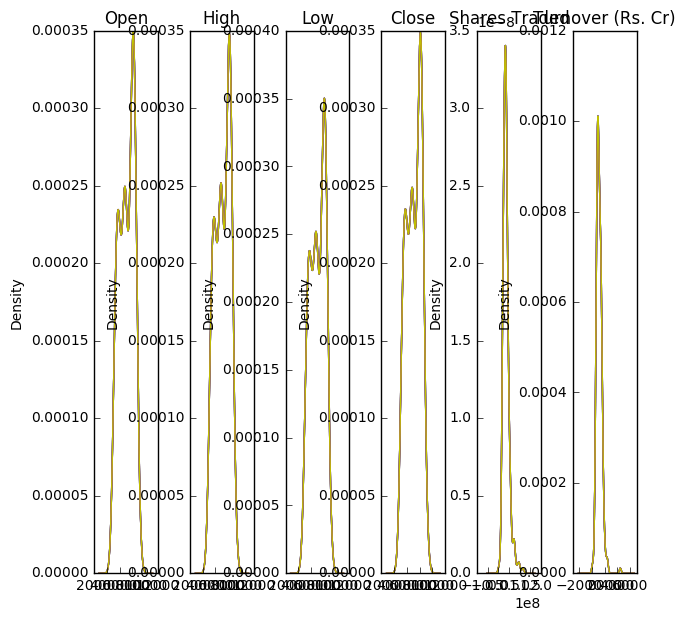

In [71]:

%matplotlib inline


num_df = df_auto.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(1,6, figsize = (7, 7))

fig.subplots_adjust(hspace=.3, wspace=.5)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

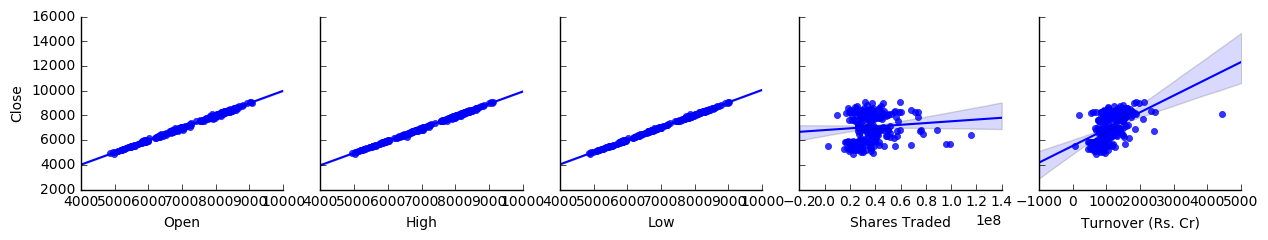

In [72]:
sns.pairplot(df_auto, x_vars = ['Open','High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)'], y_vars = ['Close'], kind = 'reg', aspect = 1)

In [356]:
X_a= df_auto[['Open', 'High', 'Low', 'Turnover (Rs. Cr)']]
y_a = df_auto['Close']

In [357]:
X_train_a, X_test_a, y_train_a, y_test_a = tts(X_a, y_a, test_size = .33, random_state = 1)

In [358]:
Lin_a = lr(normalize = 0)

In [359]:
Lin_a.fit(X_train_a, y_train_a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=0)

In [360]:
np.sqrt(metrics.mean_squared_error(y_test_a, Lin_a.predict(X_test_a)))

27.631584749790456

In [78]:
rid = rg(alpha = .5, random_state = 1, solver = 'cholesky')

In [79]:
rid.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)

In [80]:
np.sqrt(metrics.mean_squared_error(y_test, rid.predict(X_test)))

27.631582401992414

In [81]:
tree = dtr(splitter = 'random', random_state = 1, max_features = 3)

In [82]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=3,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')

In [83]:
np.sqrt(metrics.mean_squared_error(y_test, tree.predict(X_test)))

55.264021693593783

In [84]:
boost = gbr(max_features = 3, loss = 'huber', random_state = 1, n_estimators = 100)

In [85]:
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3, max_features=3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [86]:
np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test)))

53.650703600435001

In [346]:
df_pharma = pd.read_csv('C:/Users/visha/Desktop/EDC/Pharma.csv', index_col = None, header = 0)

In [347]:
df_pharma.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,03-Feb-2014,7693.00,7817.35,7693.00,7788.00,8526281,578.98
1,04-Feb-2014,7797.40,7803.55,7723.20,7737.05,10372798,645.77
2,05-Feb-2014,7752.60,7767.25,7727.95,7741.05,19729892,882.74
3,06-Feb-2014,7769.25,7801.60,7717.90,7739.90,9208963,502.38
4,07-Feb-2014,7793.45,7882.00,7777.30,7872.00,10500169,714.79


In [92]:
df_pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
Date                 241 non-null object
Open                 241 non-null float64
High                 241 non-null float64
Low                  241 non-null float64
Close                241 non-null float64
Shares Traded        241 non-null int64
Turnover (Rs. Cr)    241 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [93]:
df_pharma.corr('spearman')

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.997070,0.995412,0.991657,-0.170858,0.220118
High,0.997070,1.000000,0.996483,0.996059,-0.151982,0.240738
Low,0.995412,0.996483,1.000000,0.997771,-0.186380,0.203396
Close,0.991657,0.996059,0.997771,1.000000,-0.169606,0.221283
Shares Traded,-0.170858,-0.151982,-0.186380,-0.169606,1.000000,0.871139
Turnover (Rs. Cr),0.220118,0.240738,0.203396,0.221283,0.871139,1.000000


In [94]:
df_pharma.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000
mean,9313.208091,9384.966805,9250.984025,9316.093776,7.724468e+06,615.459959
std,1396.288519,1406.980005,1387.459329,1400.881516,3.658178e+06,248.339991
min,7401.650000,7501.650000,7357.450000,7411.600000,6.437730e+05,43.310000
25%,7926.300000,7975.600000,7885.850000,7903.300000,5.530234e+06,446.710000
50%,9123.750000,9182.750000,9056.000000,9129.350000,6.770771e+06,572.320000
75%,10723.400000,10755.050000,10627.150000,10701.700000,9.082785e+06,730.590000
max,11644.600000,11805.700000,11512.200000,11752.050000,2.945765e+07,1749.320000


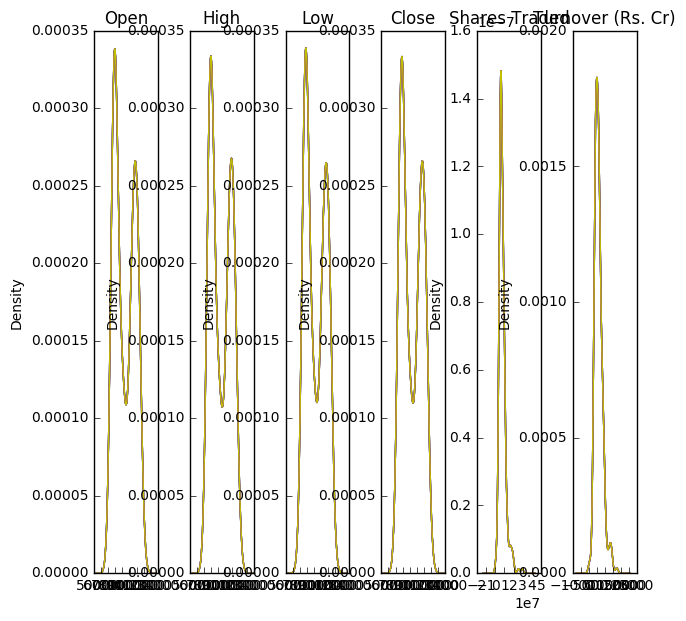

In [162]:

%matplotlib inline


num_df = df_pharma.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(1,6, figsize = (7, 7))

fig.subplots_adjust(hspace=.3, wspace=.5)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

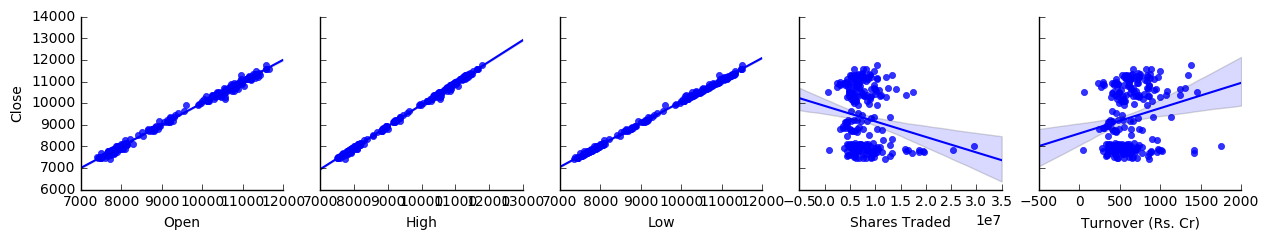

In [96]:
sns.pairplot(df_pharma, x_vars = ['Open','High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)'], y_vars = ['Close'], kind = 'reg', aspect = 1)

In [348]:
X_p = df_pharma[['Open', 'High', 'Low', 'Turnover (Rs. Cr)']]
y_p = df_pharma['Close']

In [368]:
X_train_p, X_test_p, y_train_p, y_test_p = tts(X_p, y_p, test_size = .33, random_state = 1)

In [369]:
Lin_p = lr(normalize = 1)

In [370]:
Lin_p.fit(X_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

In [371]:
np.sqrt(metrics.mean_squared_error(y_test_p, Lin_p.predict(X_test_p)))

35.115331186654799

In [171]:
net = en(selection = 'random', max_iter = 100000)

In [172]:
net.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [173]:
np.sqrt(metrics.mean_squared_error(y_test, net.predict(X_test)))

35.11815857560866

In [181]:
boost = gbr(max_features = 3, loss = 'lad', random_state = 1, n_estimators = 100)

In [182]:
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=3, max_features=3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [183]:
np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test)))

70.59781060051958

In [372]:
df_metal = pd.read_csv('C:/Users/visha/Desktop/EDC/Metal.csv', index_col = None, header = 0)

In [155]:
df_metal.head(7)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,03-Feb-2014,2274.20,2276.00,2203.55,2211.65,27431094,576.00
1,04-Feb-2014,2182.65,2210.75,2169.20,2197.55,42063943,792.49
2,05-Feb-2014,2199.05,2242.30,2192.90,2237.55,27633625,540.99
3,06-Feb-2014,2245.35,2267.75,2229.15,2258.60,37482991,779.69
4,07-Feb-2014,2272.05,2322.75,2272.05,2317.45,38096103,909.86
5,10-Feb-2014,2325.20,2351.75,2300.95,2304.65,21081225,528.19
6,11-Feb-2014,2315.10,2321.45,2295.75,2313.15,23107268,494.71


In [156]:
df_metal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
Date                 241 non-null object
Open                 241 non-null float64
High                 241 non-null float64
Low                  241 non-null float64
Close                241 non-null float64
Shares Traded        241 non-null int64
Turnover (Rs. Cr)    241 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [157]:
df_metal.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000
mean,2824.312241,2854.345643,2791.789212,2822.193983,4.371028e+07,961.988340
std,374.272460,378.578762,366.443553,372.065966,1.801362e+07,423.472099
min,2147.450000,2174.800000,2132.650000,2142.550000,3.556498e+06,62.810000
25%,2544.200000,2579.250000,2510.650000,2540.500000,3.220640e+07,705.820000
50%,2815.950000,2838.050000,2779.800000,2805.500000,4.105704e+07,879.940000
75%,3170.950000,3193.700000,3137.050000,3160.300000,4.885685e+07,1073.700000
max,3541.650000,3553.350000,3475.400000,3521.850000,1.253067e+08,2862.830000


In [159]:
df_metal.corr('spearman')

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.995616,0.994163,0.988838,0.342256,0.576275
High,0.995616,1.000000,0.995160,0.994776,0.370040,0.601771
Low,0.994163,0.995160,1.000000,0.996359,0.332859,0.565781
Close,0.988838,0.994776,0.996359,1.000000,0.356875,0.588080
Shares Traded,0.342256,0.370040,0.332859,0.356875,1.000000,0.920719
Turnover (Rs. Cr),0.576275,0.601771,0.565781,0.588080,0.920719,1.000000


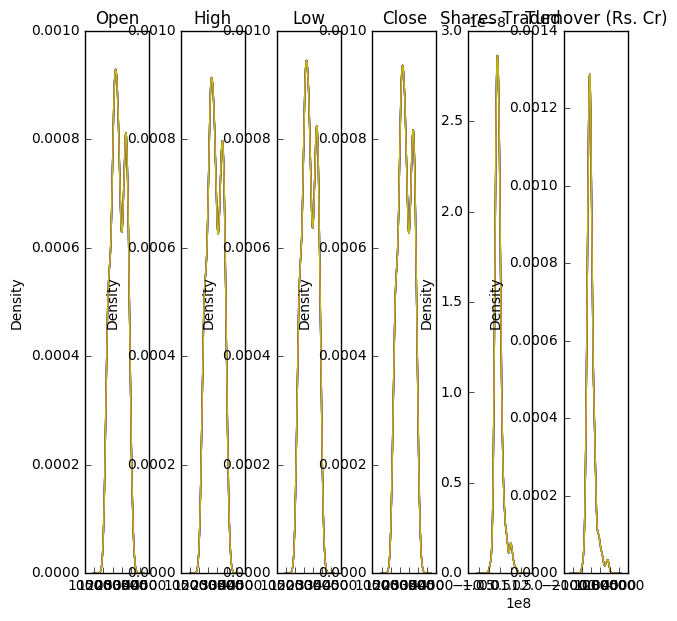

In [161]:

%matplotlib inline


num_df = df_metal.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(1,6, figsize = (7, 7))

fig.subplots_adjust(hspace=.3, wspace=.5)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

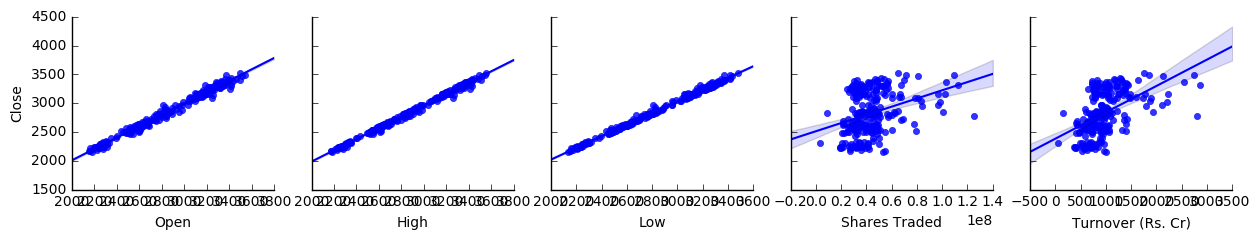

In [185]:
sns.pairplot(df_metal, x_vars = ['Open', 'High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)'], y_vars = ['Close'], kind = 'reg', aspect = 1)

In [373]:
X_m = df_metal[['Open', 'High', 'Low', 'Shares Traded', 'Turnover (Rs. Cr)']]
y_m = df_metal['Close']

In [374]:
X_train_m, X_test_m, y_train_m, y_test_m = tts(X_m, y_m, test_size = .33, random_state = 1)

In [375]:
Lin_m = lr(normalize = 0)

In [376]:
Lin_m.fit(X_train_m, y_train_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=0)

In [377]:
np.sqrt(metrics.mean_squared_error(y_test_m, Lin_m.predict(X_test_m)))

18.497602620165562

In [300]:
cat = cbr(learning_rate = .05)

In [301]:
cat.fit(X_train, y_train, plot = 0)

In [302]:
np.sqrt(metrics.mean_squared_error(y_test, cat.predict(X_test)))

83.986885854158132

In [303]:
adb = AdaBoostRegressor(base_estimator = cat, n_estimators = 150, loss = 'exponential')

In [304]:
adb.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x000001FEE2ED40F0>,
         learning_rate=1.0, loss='exponential', n_estimators=150,
         random_state=None)

In [305]:
np.sqrt(metrics.mean_squared_error(y_test, adb.predict(X_test)))

68.274809459682629

In [390]:
auto = Lin_a.predict([[9085.65, 9100.55, 8909.75, 1327.08]])

In [392]:
auto_ = (abs(auto - df_auto.iloc[0, 4])/df_auto.iloc[0, 4])*100.0

In [393]:
metal = Lin_m.predict([[2531.95, 2535.15, 2503.65, 44985869, 1128.64]])

In [394]:
metal_ = (abs(metal - df_metal.iloc[0, 4])/df_metal.iloc[0, 4])*100.0

In [396]:
pharma = Lin_p.predict([[11784.05, 11792.10, 11647.05, 759.07]])

In [397]:
pharma_ = (abs(pharma - df_pharma.iloc[0, 4])/df_pharma.iloc[0, 4])*100.0

In [413]:
realty = Lin_r.predict([[233.75, 240.80, 232.60, 212287598, 1322.91]])

In [415]:
realty_ = (abs(realty - df_real.iloc[0, 4])/df_real.iloc[0, 4])*100.0

In [443]:
bank = Lin_b.predict([[20600.65, 20600.65, 19732.45]])

In [444]:
bank_ = (abs(bank - df_bank.iloc[0, 4])/df_bank.iloc[0, 4])*100.0

In [452]:
returns = {"Auto": auto, "Metal": metal, "Pharma": pharma, "Realty": realty, "Bank": bank}

In [454]:
per_chang = {"Auto": auto_, "Metal": metal_, "Pharma": pharma_, "Realty": realty_, "Bank": bank_}

In [463]:
returns

{'Auto': array([ 8951.68708778]),
 'Bank': array([ 19828.6430799]),
 'Metal': array([ 2515.59525793]),
 'Pharma': array([ 11680.59677101]),
 'Realty': array([ 239.10898548])}

In [464]:
per_chang

{'Auto': array([ 82.22634736]),
 'Bank': array([ 303.64471704]),
 'Metal': array([ 13.74291854]),
 'Pharma': array([ 49.98198216]),
 'Realty': array([ 58.03634203])}

In [470]:
help(lr)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [467]:
Lin_a.score(X_test_a, y_test_a)

0.99944255398814696

In [471]:
Lin_b.score(X_test_b, y_test_b)

0.99944721550428905

In [472]:
Lin_m.score(X_test_m, y_test_m)

0.9975594549136334

In [473]:
Lin_r.score(X_test_r, y_test_r)

0.99732491909357801

In [474]:
Lin_p.score(X_test_p, y_test_p)

0.99942201821651189